# Importing Libraries & dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
%matplotlib inline

In [3]:
dataset = pd.read_csv('ckd.csv')

In [4]:
cleanup = {"rbc":     {"normal": 1, "abnormal": 0},
           "pc": {"normal": 1, "abnormal": 0},
           "pcc": {"present": 1, "notpresent": 0},
           "ba": {"present": 1, "notpresent": 0},
           "htn": {"yes": 1, "no": 0},
           "dm": {"yes": 1, "no": 0},
           "cad": {"yes": 1, "no": 0},
           "appet": {"good": 1, "poor": 0},
           "pe": {"yes": 1, "no": 0},
           "ane": {"yes": 1, "no": 0},
           "class": {"ckd": 1, "notckd": 0}}

In [5]:
dataset.replace(cleanup, inplace = True)

In [26]:
cm = sns.light_palette("green", as_cmap=True)
dataset.head().style.background_gradient(cmap=cm).set_precision(2).highlight_null('red')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.00,80.00,1.02,1.00,0.00,nan,1.00,0.00,0.00,121.00,36.00,1.20,nan,nan,15.40,44.00,7800.00,5.20,1.00,1.00,0.00,1.00,0.00,0.00,1
1,7.00,50.00,1.02,4.00,0.00,nan,1.00,0.00,0.00,nan,18.00,0.80,nan,nan,11.30,38.00,6000.00,nan,0.00,0.00,0.00,1.00,0.00,0.00,1
2,62.00,80.00,1.01,2.00,3.00,1.00,1.00,0.00,0.00,423.00,53.00,1.80,nan,nan,9.60,31.00,7500.00,nan,0.00,1.00,0.00,0.00,0.00,1.00,1
3,48.00,70.00,1.00,4.00,0.00,1.00,0.00,1.00,0.00,117.00,56.00,3.80,111.00,2.50,11.20,32.00,6700.00,3.90,1.00,0.00,0.00,0.00,1.00,1.00,1
4,51.00,80.00,1.01,2.00,0.00,1.00,1.00,0.00,0.00,106.00,26.00,1.40,nan,nan,11.60,35.00,7300.00,4.60,0.00,0.00,0.00,1.00,0.00,0.00,1


# KNN imputational process

In [7]:
def knnImputerDatasetGenerator(df, neighbors):
    
    imputer_uniform = KNNImputer(n_neighbors=neighbors, weights = 'uniform')
    dataset_uniform = imputer_uniform.fit_transform(df)
    
    return pd.DataFrame(dataset_uniform, columns = df.columns)

In [8]:
df_knn_imputed_uniform_3 = knnImputerDatasetGenerator(dataset, 3)
df_knn_imputed_uniform_5 = knnImputerDatasetGenerator(dataset, 5)
df_knn_imputed_uniform_7 = knnImputerDatasetGenerator(dataset, 7)
df_knn_imputed_uniform_9 = knnImputerDatasetGenerator(dataset, 9)
df_knn_imputed_uniform_11 = knnImputerDatasetGenerator(dataset, 11)
df_mean_imputed = dataset.fillna(dataset.mean())

In [9]:
df_knn_imputed_uniform_3

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.666667,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.333333,1.0,0.0,0.0,113.666667,...,38.0,6000.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,...,31.0,7500.0,3.966667,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,140.000000,...,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,75.000000,...,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,100.000000,...,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,114.000000,...,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
dfs = [df_knn_imputed_uniform_3,df_knn_imputed_uniform_5,
        df_knn_imputed_uniform_7,df_knn_imputed_uniform_9,
        df_knn_imputed_uniform_11,df_mean_imputed]

# Feature Extraction

correlation of class(label) wrt other columns(features) for  knn_imputed_3
al == 0.6069898
htn == 0.5886311
dm == 0.5526632
bgr == 0.405334
bu == 0.3748329
pe == 0.3724598
su == 0.3330835
ane == 0.3253957
sc == 0.2958455
bp == 0.2745909
pcc == 0.2616616
wbcc == 0.2364881
cad == 0.2360883
age == 0.20528
ba == 0.1868706
pot == 0.0651604
sod == -0.3412868
appet == -0.3907533
pc == -0.4160012
rbcc == -0.5621971
rbc == -0.58256
pcv == -0.6651289
hemo == -0.706518
sg == -0.7099808


correlation of class(label) wrt other columns(features) for  knn_imputed_5
al == 0.6094613
htn == 0.5894384
dm == 0.5556327
bgr == 0.413736
pe == 0.3736184
bu == 0.3727686
su == 0.3363357
ane == 0.3253957
sc == 0.2951798
bp == 0.2760302
pcc == 0.2632148
cad == 0.2337516
wbcc == 0.2298701
age == 0.2114818
ba == 0.1868706
pot == 0.0662651
sod == -0.3382018
appet == -0.3918684
pc == -0.4329706
rbcc == -0.5724569
rbc == -0.5884792
pcv == -0.6742803
sg == -0.7116524
hemo == -0.7128076


correlation of class(label) wrt

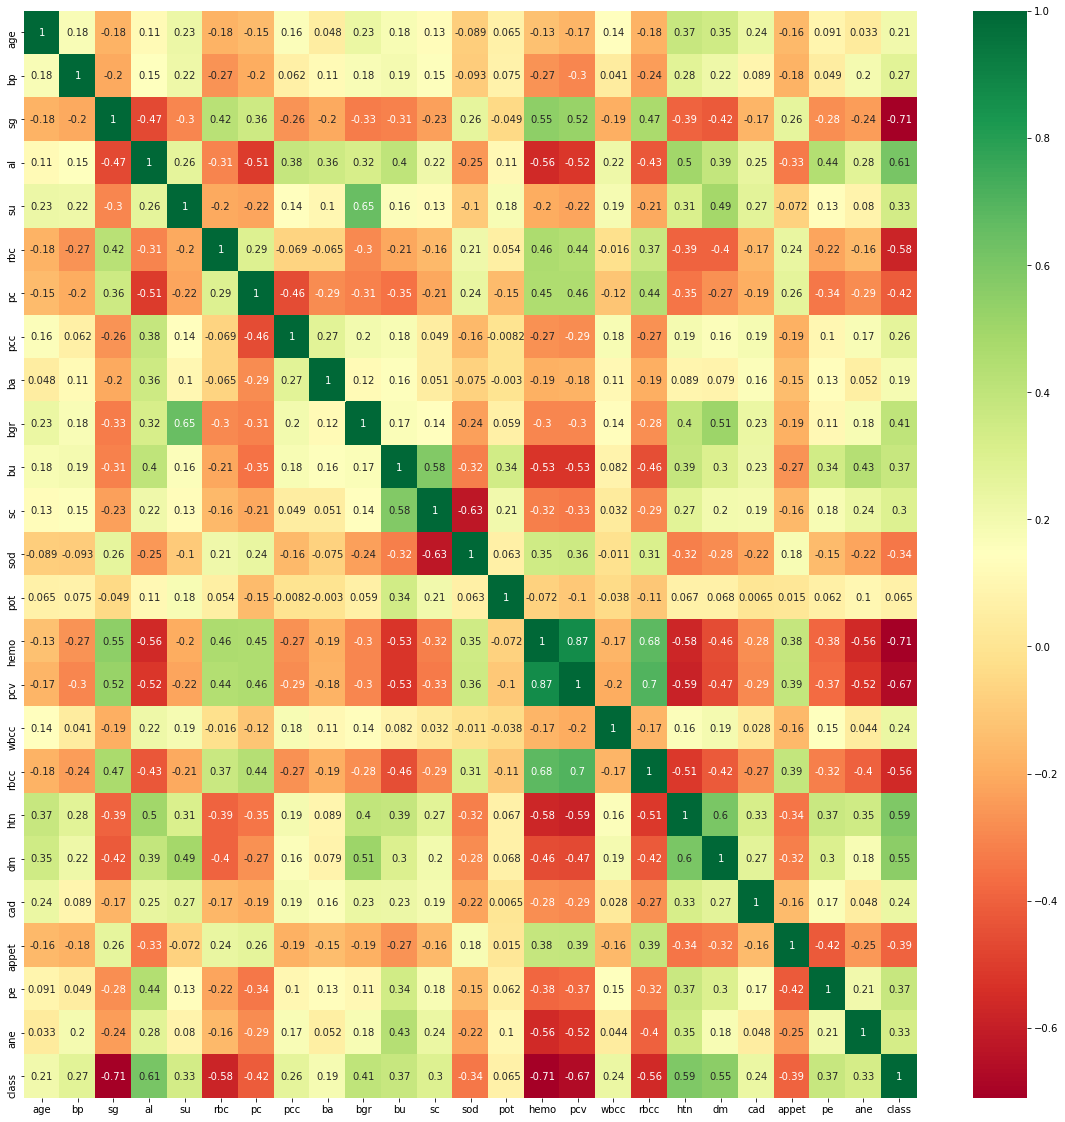

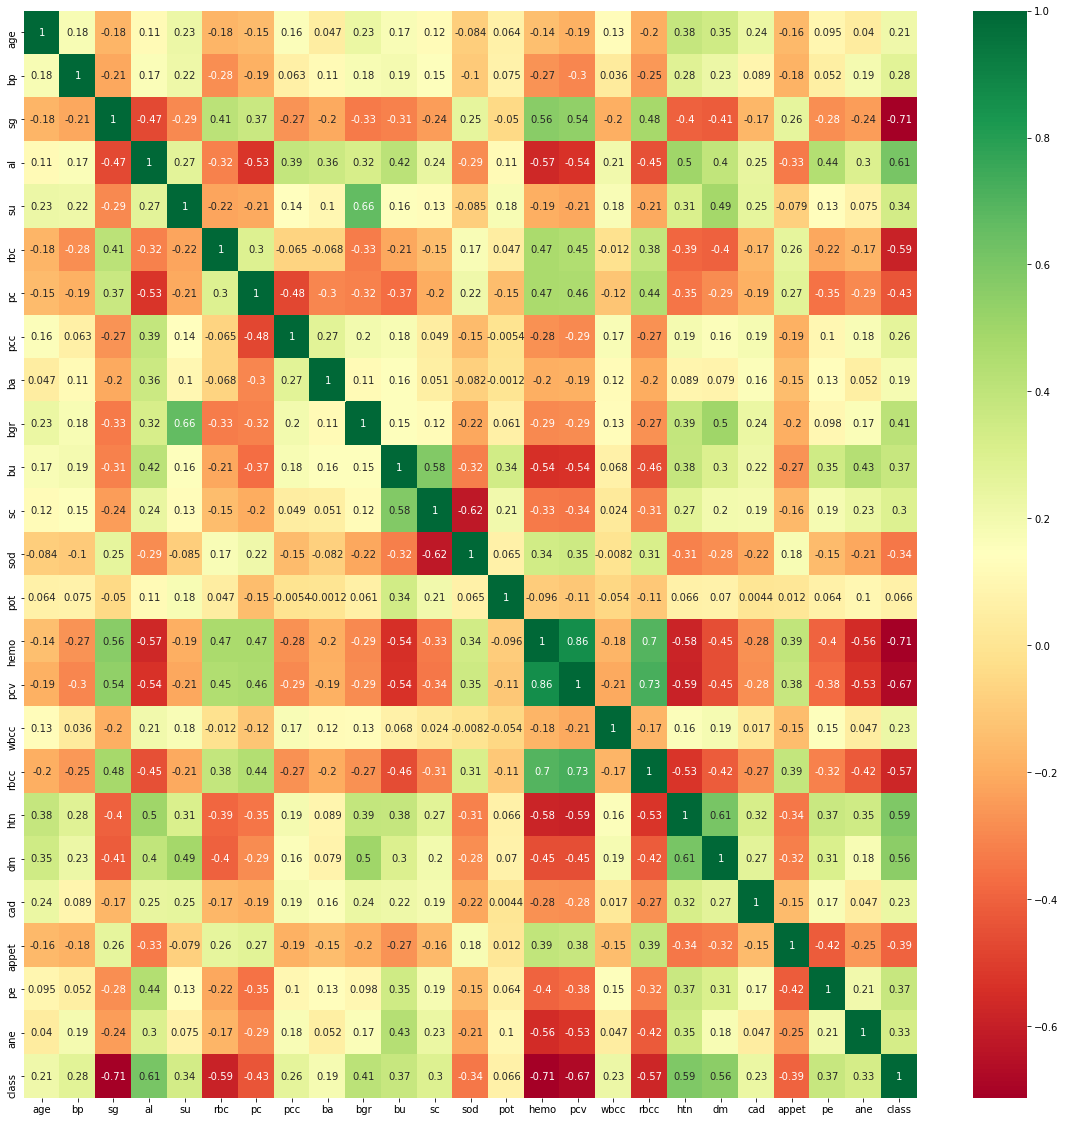

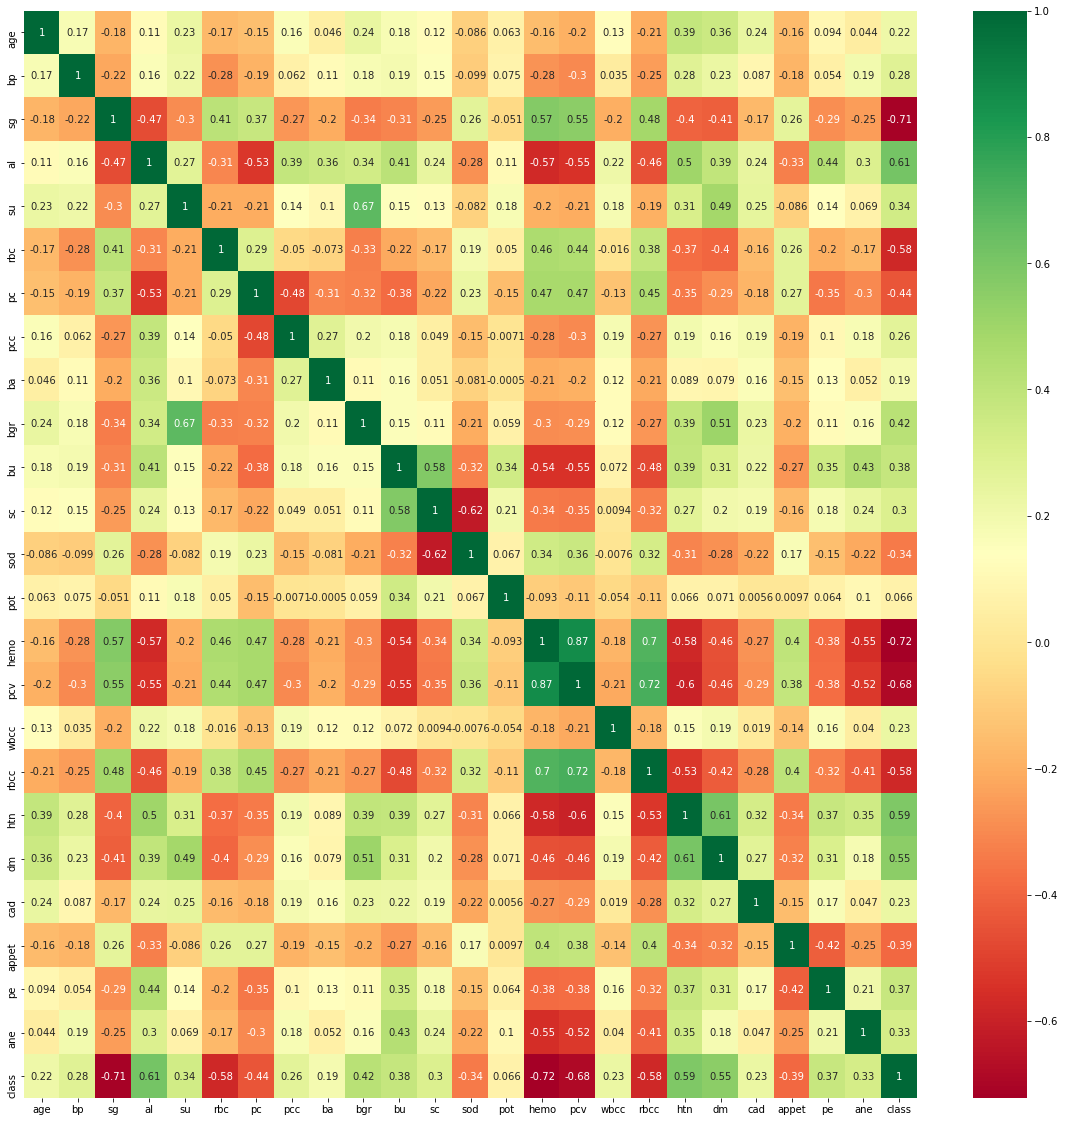

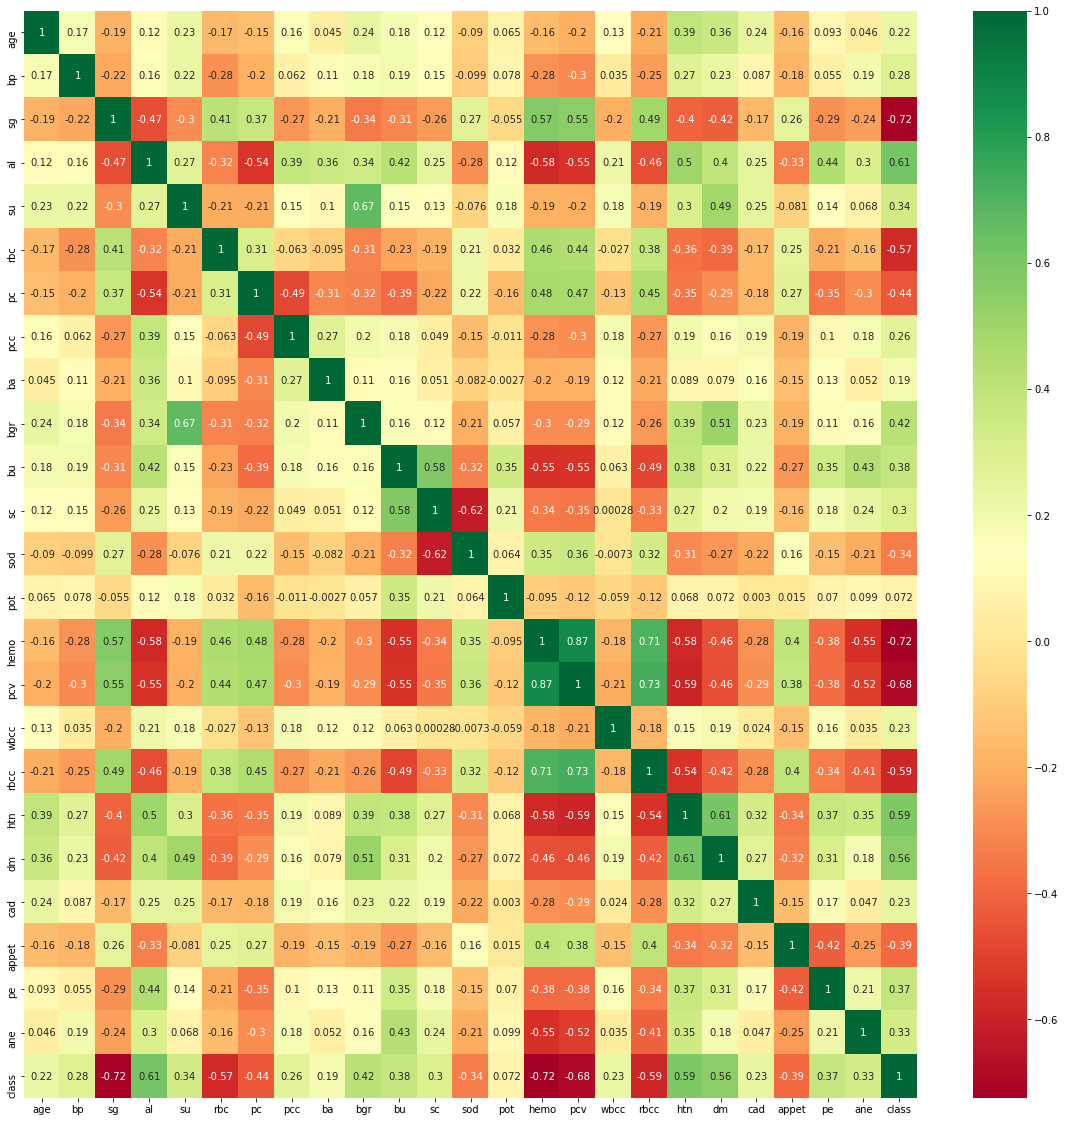

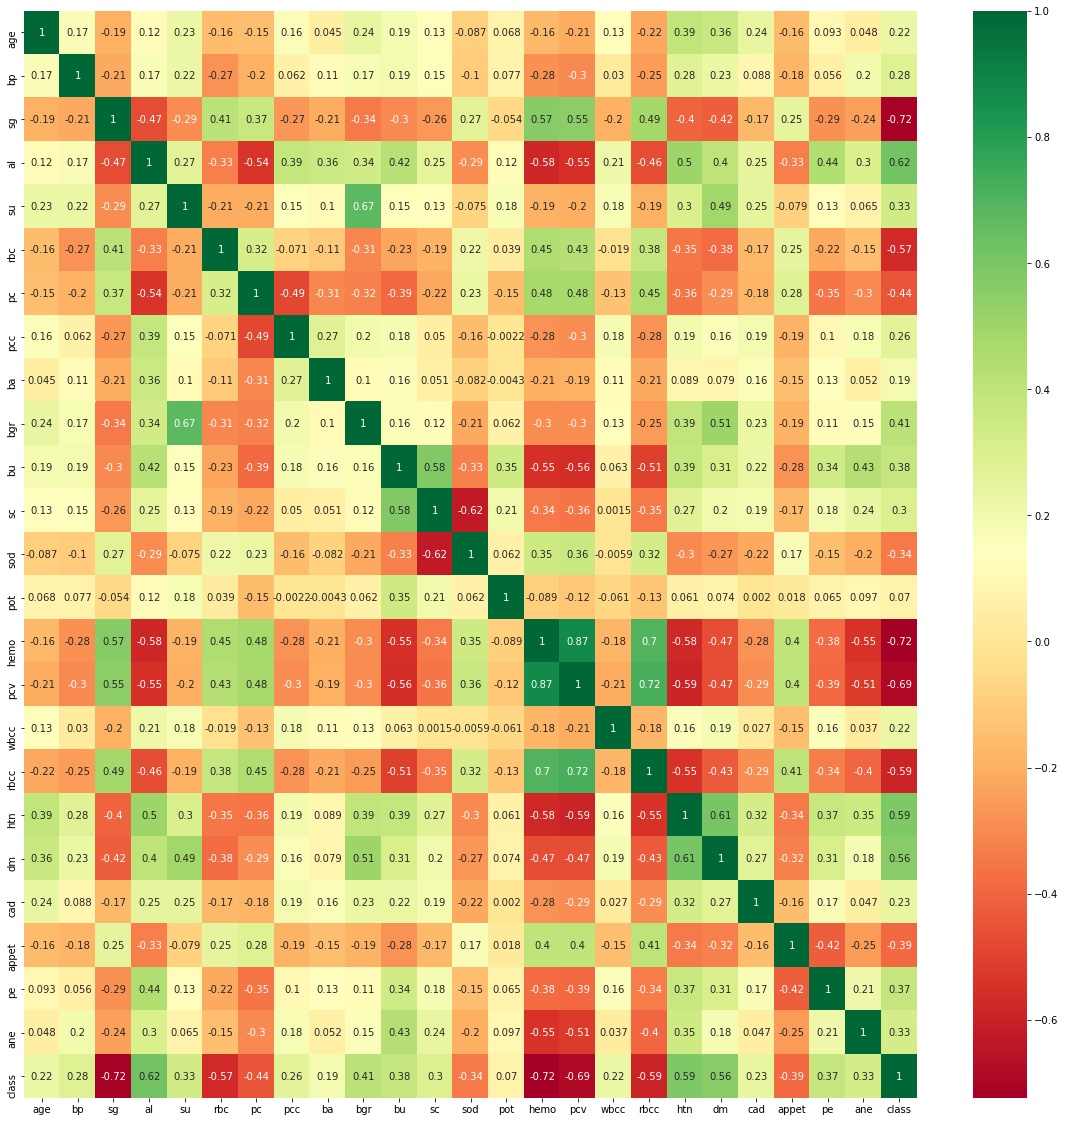

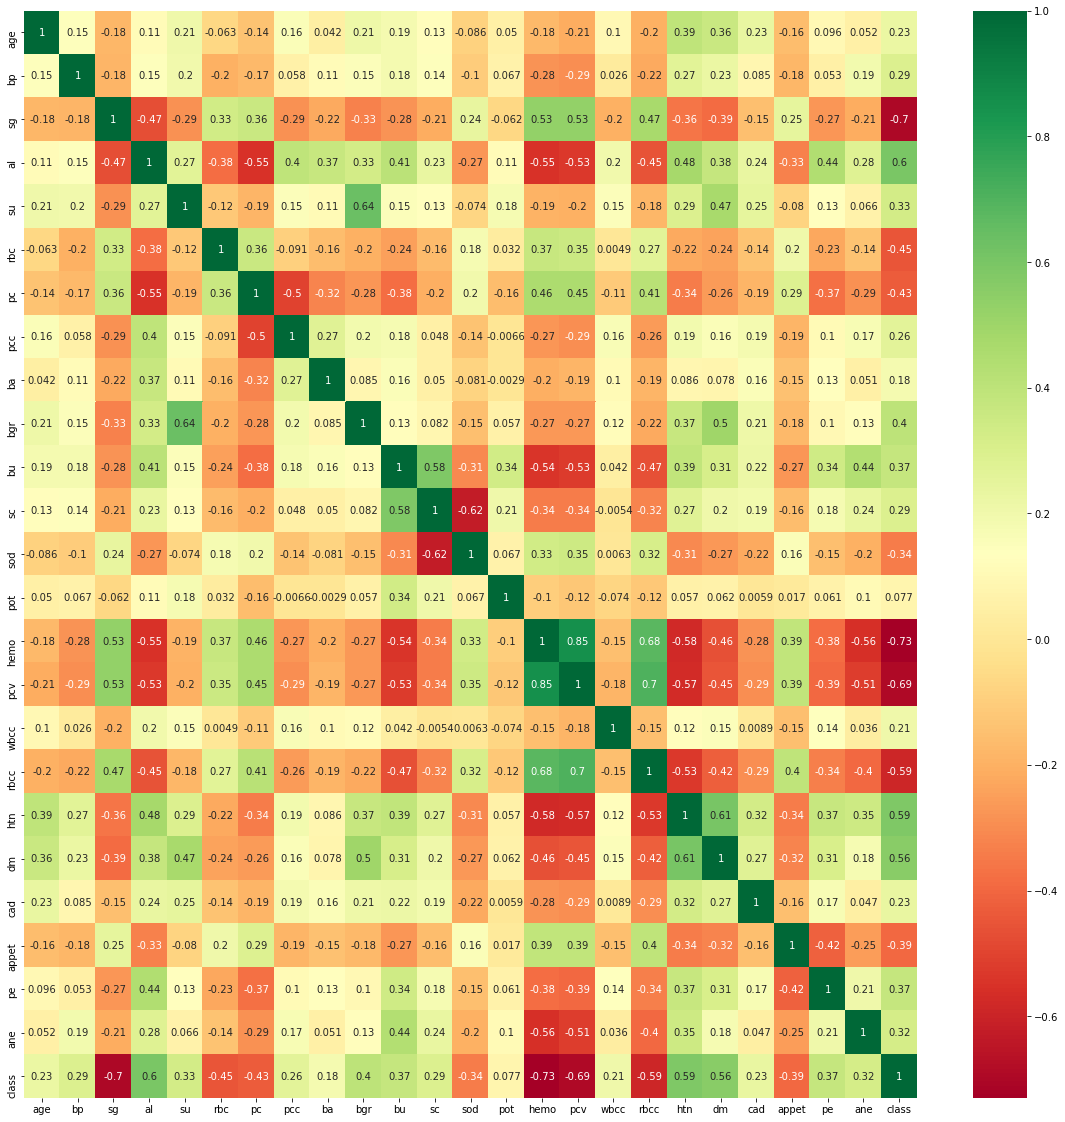

In [25]:
#dfs: array of imputed df
feat = {}

dfs_name = ["knn_imputed_3", "knn_imputed_5",
                "knn_imputed_7","knn_imputed_9",
                "knn_imputed_11","df_mean_imputed"]
    
for i, df in enumerate(dfs):
    x = df.iloc[:, :-1]
    y = df['class']
        
    print('\033[1mcorrelation of class(label) wrt other columns(features) for ',dfs_name[i])
    plt.figure(figsize = (20,20))
    sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn');
    corrs = {}
    
    for feature in x:
        corrs[feature] = df['class'].corr(df[feature]).round(7)

    for w in sorted(corrs, key = corrs.get, reverse=True):
        if(corrs[w] > 0):
            print("\033[92m{} == {}".format(w,corrs[w]))
            feat[w] = w
        else:
            print("\033[91m{} == {}".format(w,corrs[w]))
            
    
                
    print('\n')


In [13]:
print(feat)

{'al': 'al', 'htn': 'htn', 'dm': 'dm', 'bgr': 'bgr', 'bu': 'bu', 'pe': 'pe', 'su': 'su', 'ane': 'ane', 'sc': 'sc', 'bp': 'bp', 'pcc': 'pcc', 'wbcc': 'wbcc', 'cad': 'cad', 'age': 'age', 'ba': 'ba', 'pot': 'pot'}


# Models(LOG, KNN, RF, SVM, NB) Applying on the KNN-Imputed & Mean-Imputed Dataset

In [21]:
def models(x):
    
    if(x==0):
        classifier = LogisticRegression()
    elif(x==1):
        classifier = KNeighborsClassifier()
    elif(x==2):
        classifier = RandomForestClassifier(n_estimators = 500)
    elif(x==3):
        classifier = SVC(kernel='rbf',random_state=None)
    else:
        classifier = GaussianNB()
        
    res = {}
    
    #dfs: array of imputed df
    dfs = [df_knn_imputed_uniform_3,df_knn_imputed_uniform_5,
        df_knn_imputed_uniform_7,df_knn_imputed_uniform_9,
        df_knn_imputed_uniform_11,df_mean_imputed]
    
    dfs_name = ["knn_imputed_3", "knn_imputed_5",
                "knn_imputed_7","knn_imputed_9",
                "knn_imputed_11","mean_imputed"]

    for i, df in enumerate(dfs):
        x = df.iloc[:, [2,5,12,14,15,17,21]]
        y = df['class']
#         0,1,3,4,7,8,9,10,11,13,16,18,19,20,22,23
#         'age','bp','al','su','pcc','ba','bgr','bu','sc','pot','wbcc','htn','dm','cad','pe','ane'
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = True, random_state = 42)
        
        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        classifier.fit(x_train,y_train)
        
        test_pred = classifier.predict(x_test)
        train_pred = classifier.predict(x_train).round(7)
       
        # print(test_pred)
        train_acc = accuracy_score(y_train, train_pred).round(7)
        test_acc = accuracy_score(y_test, test_pred).round(7)
        
        tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
        classification_report(y_test, test_pred)
        res[dfs_name[i]] = [train_acc, test_acc, tn, fp, fn, tp]
        
    return res

In [22]:
# models(0)
for i in range(5):
    result = models(i)
    res = pd.DataFrame.from_dict(data = result,orient='index', columns = ['train_acc', 'test_acc', 'true_neg', 'false_pos', 'false_neg', 'true_pos'])
    if(i==0):
        print("\033[1m",i+1,".PERFORMANCE INDICATORS for Logistic Regression \n")
    elif(i==1):
        print(i+1,"\033[1m"+".PERFORMANCE INDICATORS for KNN \n")
    elif(i==2):
        print(i+1,"\033[1m"+".PERFORMANCE INDICATORS for Random Forest \n")
    elif(i==3):
        print(i+1,"\033[1m"+".PERFORMANCE INDICATORS for SVM \n")
    else:
        print(i+1,"\033[1m"+".PERFORMANCE INDICATORS for Naive Bayes \n")
        
    print(res,'\n')

 1 .PERFORMANCE INDICATORS for Logistic Regression 

                train_acc  test_acc  true_neg  false_pos  false_neg  true_pos
knn_imputed_3    0.976667      0.98        34          1          1        64
knn_imputed_5    0.976667      0.97        33          2          1        64
knn_imputed_7    0.983333      0.98        34          1          1        64
knn_imputed_9    0.980000      0.98        34          1          1        64
knn_imputed_11   0.980000      0.98        34          1          1        64
mean_imputed     0.980000      0.99        35          0          1        64 

2 .PERFORMANCE INDICATORS for KNN 

                train_acc  test_acc  true_neg  false_pos  false_neg  true_pos
knn_imputed_3    0.976667      0.99        34          1          0        65
knn_imputed_5    0.973333      0.97        33          2          1        64
knn_imputed_7    0.980000      0.97        32          3          0        65
knn_imputed_9    0.976667      0.97        32      